# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
# Your code here

data = pd.read_csv("PS_20174392719_1491204439457_log.csv", nrows=100000)


In [165]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [166]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [167]:
data.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,C1410794718,159929.0,155908.34,M1257036576,0.00,0.00,0,0
99996,10,PAYMENT,18345.49,C744303677,6206.0,0.00,M1785344556,0.00,0.00,0,0
99997,10,CASH_IN,183774.91,C104331851,39173.0,222947.91,C36392889,54925.05,0.00,0,0
99998,10,CASH_OUT,82237.17,C707662966,6031.0,0.00,C1553004158,592635.66,799140.46,0,0


In [168]:
data = data.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1)


In [169]:
data.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0


In [170]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [171]:
dummies = pd.get_dummies(data['type'])

In [172]:
dummies

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
99995,0,0,0,1,0
99996,0,0,0,1,0
99997,1,0,0,0,0
99998,0,1,0,0,0


In [173]:
data = pd.concat([data,dummies], axis=1)

In [174]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.00,0.00,1,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10,PAYMENT,4020.66,159929.0,155908.34,0.00,0.00,0,0,0,0,1,0
99996,10,PAYMENT,18345.49,6206.0,0.00,0.00,0.00,0,0,0,0,1,0
99997,10,CASH_IN,183774.91,39173.0,222947.91,54925.05,0.00,0,1,0,0,0,0
99998,10,CASH_OUT,82237.17,6031.0,0.00,592635.66,799140.46,0,0,1,0,0,0


In [59]:
import seaborn as sns


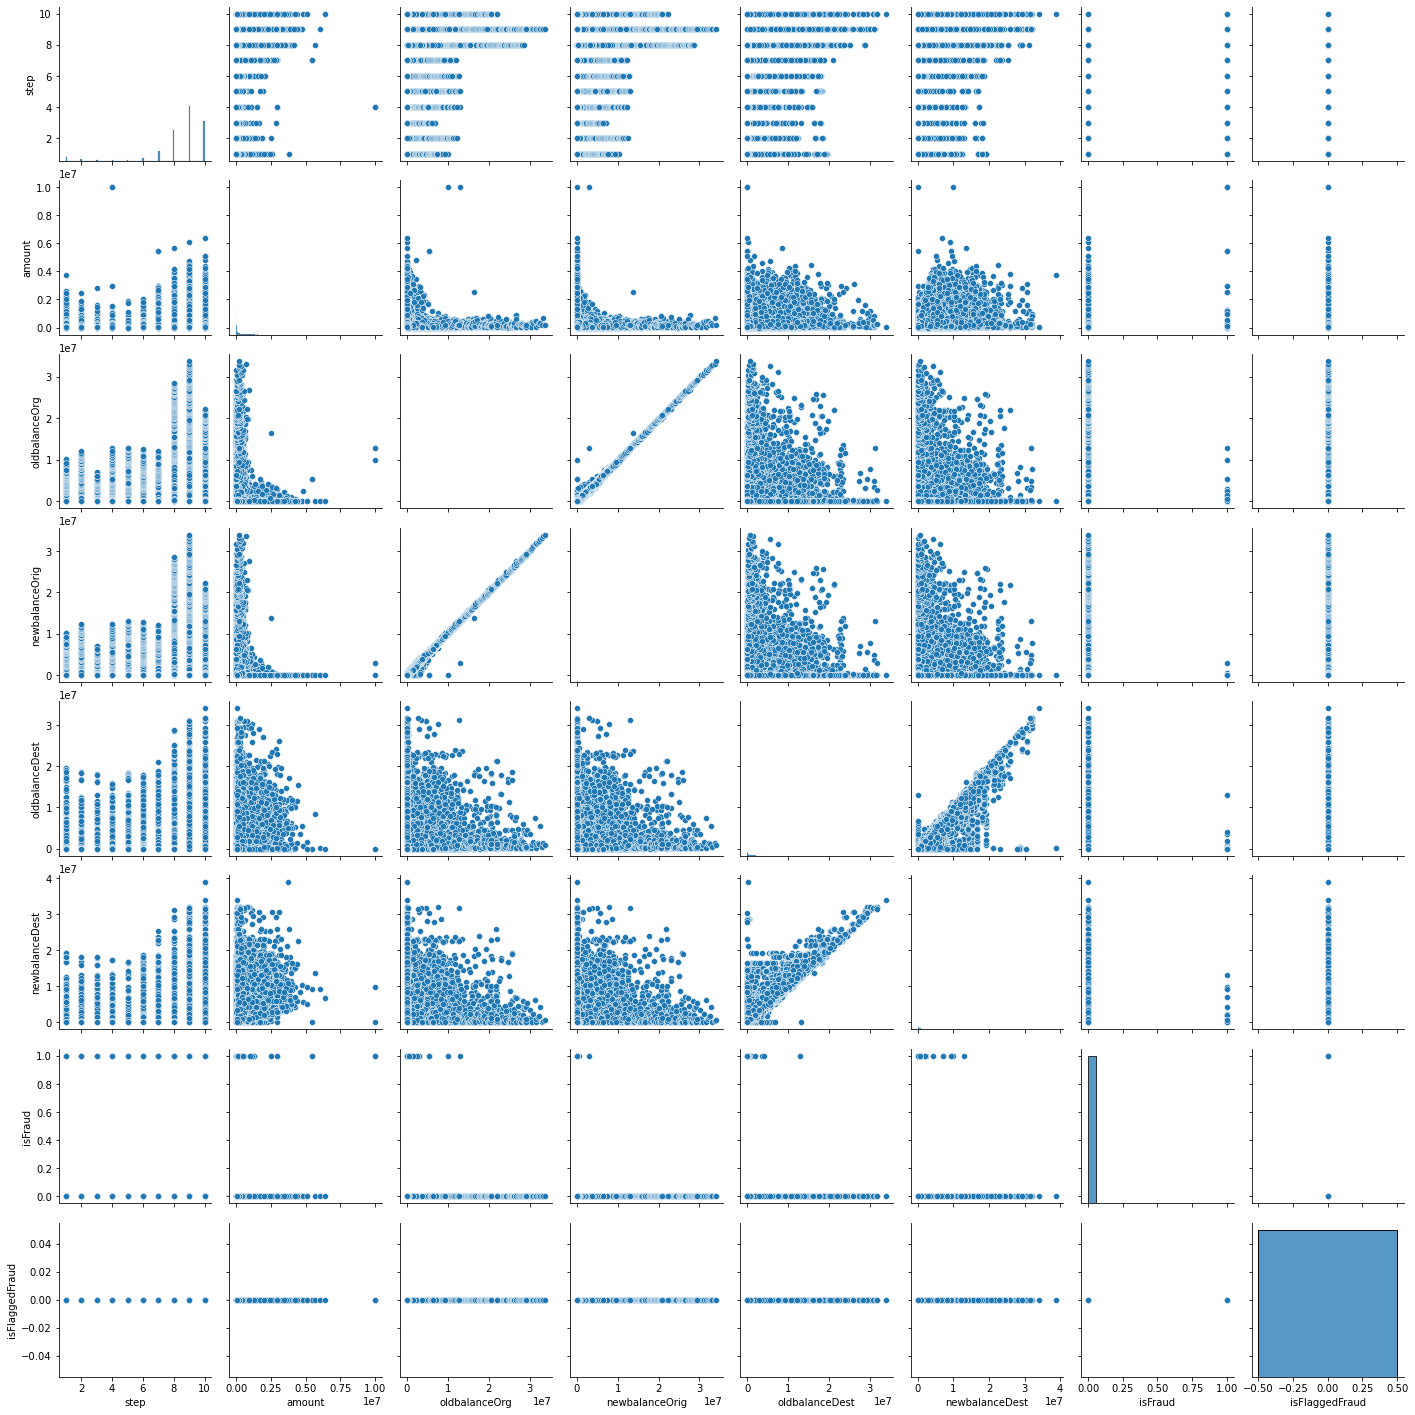

In [30]:
sns.pairplot(data)

### What is the distribution of the outcome? 

In [ ]:
# Your response here: Binary viable

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [176]:
# Your code here; no cos we dont have a referencial time scale and can influence the result of the regression, shall be categorical. 
data['step'] = data['step'].astype('object')

In [177]:
data.dtypes

step               object
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
CASH_IN             uint8
CASH_OUT            uint8
DEBIT               uint8
PAYMENT             uint8
TRANSFER            uint8
dtype: object

### Run a logisitc regression classifier and evaluate its accuracy.

In [178]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [190]:
x = data.drop(['isFraud', 'type'], axis=1)


In [191]:
y = data['isFraud']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(x, y,random_state = 0, test_size = 0.20)


In [193]:
x2 = pd.concat([X_train, y_train], axis=1)

In [194]:
not_fraud = x2[x2['isFraud']==0]

In [195]:
fraud = x2[x2['isFraud']==1]

In [196]:
fraud_ext = resample(fraud, n_samples=len(not_fraud), replace=True, random_state=15)

In [197]:
upsampled = pd.concat([not_fraud,fraud_ext])

In [198]:
X_train = upsampled.drop(['isFraud'], axis=1)
y_train = upsampled['isFraud']

In [199]:
model = LogisticRegression()

In [200]:
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9229469626811504
0.89825


### Now pick a model of your choice and evaluate its accuracy.

In [202]:
# Your code here: RandomForest

from sklearn.ensemble import RandomForestClassifier

In [203]:
forest = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')

In [204]:
model_forest = forest.fit(X_train, y_train)

In [205]:
print(model_forest.score(X_train, y_train))
print(model_forest.score(X_test, y_test))

1.0
0.999


### Which model worked better and how do you know?

In [2]:
# Your response here: I believe the second model is overfitting, could you please indicate how to detect that here?

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.